####  (b)Take a grayscale image of size 512x512, add some Gaussian Noise & observe the Ringing Effect of Ideal Low Pass Filter on the image. Use different radius of Ideal Low Pass Filter & display their results

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

### Loading the image

shape of the image: (688, 688)


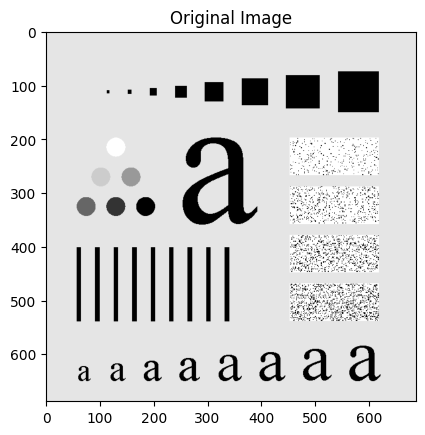

min pixel intensity: 0
max pixel intensity: 255


In [3]:
original_image= cv2.imread('./images/Characters_Test_Pattern.tif',0)
print(f'shape of the image: {original_image.shape}')
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Adding the Gaussain Noise

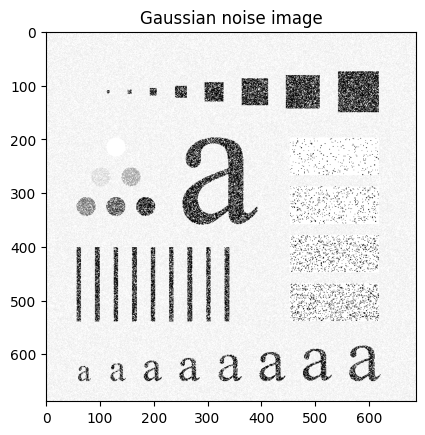

In [4]:
mean = 7
std_dev = 13

gaussian_noise = np.random.normal(mean, std_dev, original_image.shape).astype(np.uint8) #generating random values following a Gaussian(normal) distribution
noisy_image = cv2.add(original_image, gaussian_noise)
 
plt.imshow(noisy_image, cmap='gray')
plt.title("Gaussian noise image") 
plt.show()

FFT of Noisy image

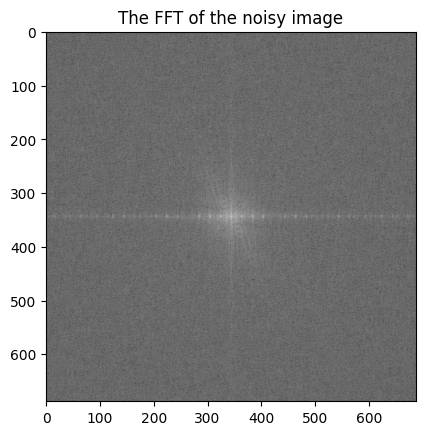

In [5]:
fft = np.fft.fft2(noisy_image)
fft_shift = np.fft.fftshift(fft)
noisy_image_fft = fft_shift

magnitude_spectrum = np.log10(np.abs(noisy_image_fft) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('The FFT of the noisy image')
plt.show()

### Ideal Low Pass Filter

In [6]:
def ideal_lowPass_filter(image, cutoff_frequency):
    #Convert the image to the frequency Domain
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft) #shift zero frequency to the center
    
    #Ideal LowPass Filter mask
    height, width = image.shape
    c1, c2 = height/2, width/2
    
    mask = np.zeros((height, width), dtype=np.float64)
    for u in range(height):
        for v in range(width):
            D = np.sqrt((u-c1)**2 + (v-c2)**2)
            if D <= cutoff_frequency:
                mask[u,v] = 1
    
    #Apply the mask
    filtered_fft = fft_shift*mask
    
    #Back to the spatial Domain
    fft_ishift = np.fft.ifftshift(filtered_fft)
    filtered_image = np.fft.ifft2(fft_ishift)
    filtered_image = np.abs(filtered_image)
    
    return filtered_image            
            
            

### Applying ideal low pass filter for different cutoff frequency

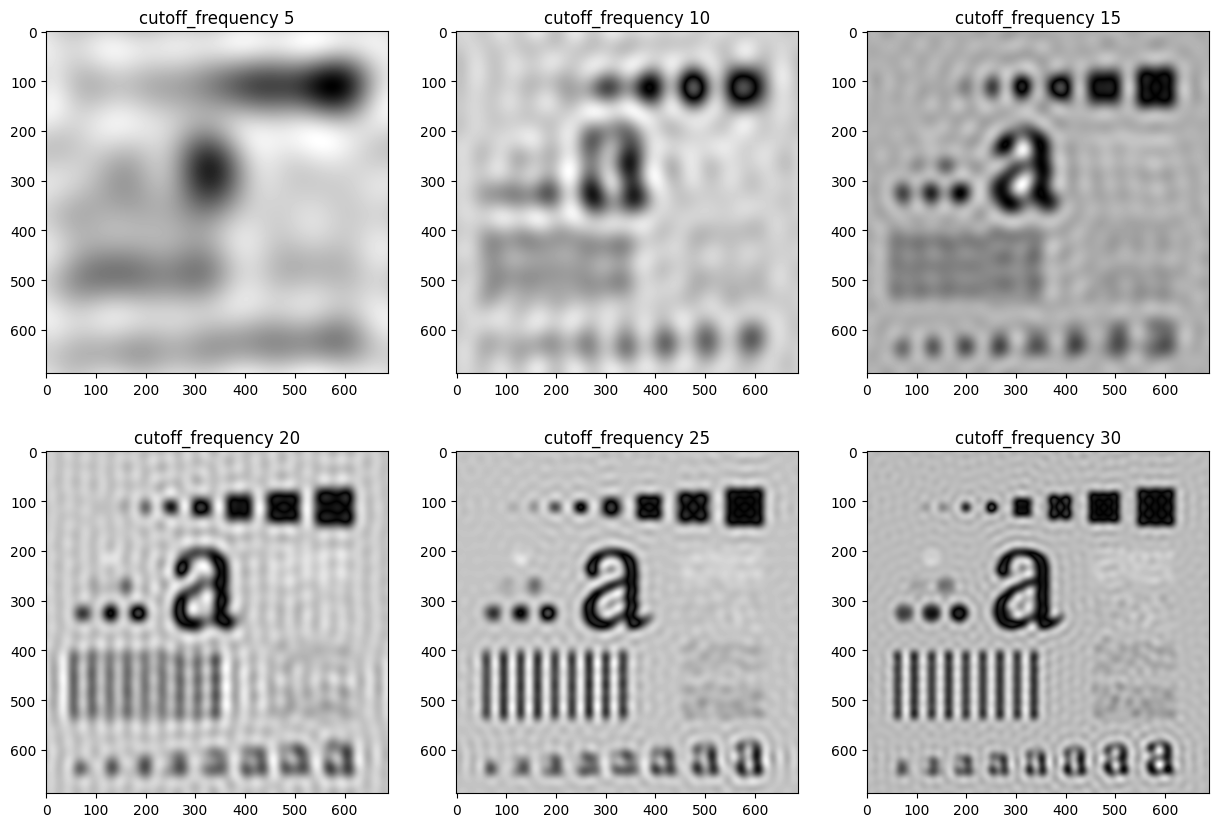

In [7]:
plt.figure(figsize=(15,10))
for i  in range(1,7):
    filtered_image = ideal_lowPass_filter(original_image, i*5)
    plt.subplot(2,3,i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"cutoff_frequency {i*5}")
    
plt.show()    
    